In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.multiclass import OneVsRestClassifier #FOR ROC CURVE
from sklearn.metrics import cohen_kappa_score

In [2]:
df = pd.read_csv("df_norm.csv", 
                 index_col = 0)

In [3]:
class_names = df['CLASS']
class_names = class_names.tolist()
col_names = df.columns
class_label = np.unique(class_names)

In [16]:
df.shape

(200, 35)

In [17]:
X = df.drop('CLASS',axis=1)
Y = df['CLASS']

In [18]:
Y_bin = label_binarize(df['CLASS'], 
                       classes=class_label)

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    Y_bin, 
                                                    test_size=0.2,
                                                    stratify=class_names)
y_true = np.argmax(y_test, axis = 1) ## VETORIZANDO PARA AS FUNCOES ABAIXO

# SVM

In [23]:
from sklearn import svm

In [26]:
krnl = ['linear', 'poly', 'rbf', 'sigmoid']

for kernel in krnl:
    svm_clf = OneVsRestClassifier(svm.SVC(kernel=kernel,
                                          probability=True))

    svm_fit = svm_clf.fit(X_train, y_train)

    print("Learning rate: ", kernel)
    print("Accuracy score (training): {0:.3f}".format(svm_fit.score(X_train, y_train)))
    print("Accuracy score (teste): {0:.3f}".format(svm_fit.score(X_test, y_test)))


Learning rate:  linear
Accuracy score (training): 0.700
Accuracy score (teste): 0.600
Learning rate:  poly
Accuracy score (training): 0.750
Accuracy score (teste): 0.575
Learning rate:  rbf
Accuracy score (training): 0.719
Accuracy score (teste): 0.575
Learning rate:  sigmoid
Accuracy score (training): 0.237
Accuracy score (teste): 0.200


In [27]:
svm_clf = OneVsRestClassifier(svm.SVC(kernel='linear',
                                      probability=True))

y_predp_ovr_svm = svm_clf.fit(X_train, y_train).predict_proba(X_test)
y_pred_ovr_svm = svm_clf.fit(X_train, y_train).predict(X_test)
y_pred_svm = np.argmax(y_pred_ovr_svm, axis=1)

In [28]:
svm_cm = confusion_matrix(y_true=y_true, 
                          y_pred=y_pred_svm)

Text(0.5, 1.0, 'Heatmap for Gradient Boosting Classification Model')

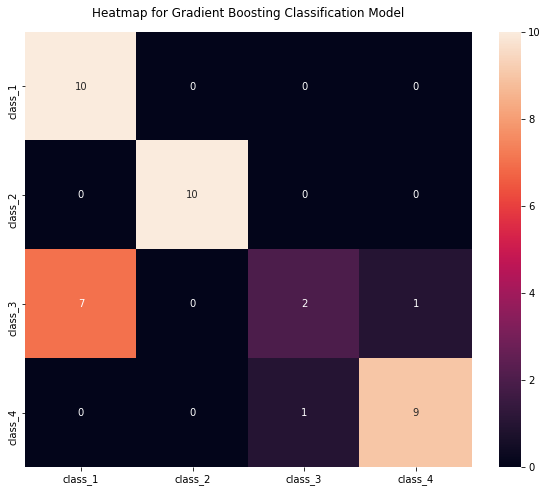

In [29]:
plt.figure(figsize = (10,8))
ax = plt.axes()
x_axis_labels = ['class_1', 'class_2', 'class_3', 'class_4'] # labels for x-axis
y_axis_labels = ['class_1', 'class_2', 'class_3', 'class_4'] # labels for y-axis
sns.heatmap(svm_cm,
            vmin=0,
            vmax=10,
            annot=True,
            fmt="d",
            ax = ax,
            xticklabels=x_axis_labels, 
            yticklabels=y_axis_labels)
ax.set_title('Heatmap for Gradient Boosting Classification Model',pad=15)

In [31]:
print(classification_report(y_true, y_pred_svm, target_names=class_label))
print("Accuracy:",metrics.accuracy_score(y_true, y_pred_svm))

              precision    recall  f1-score   support

     class_1       0.59      1.00      0.74        10
     class_2       1.00      1.00      1.00        10
     class_3       0.67      0.20      0.31        10
     class_4       0.90      0.90      0.90        10

    accuracy                           0.78        40
   macro avg       0.79      0.78      0.74        40
weighted avg       0.79      0.78      0.74        40

Accuracy: 0.775


In [32]:
# Compute ROC curve and ROC area for each class
fpr_svm = dict()
tpr_svm = dict()
roc_auc_svm = dict()
for i in range(class_label.shape[0]):
    fpr_svm[i], tpr_svm[i], _ = roc_curve(y_test[:, i], y_pred_ovr_svm[:, i])
    roc_auc_svm[i] = auc(fpr_svm[i], tpr_svm[i])

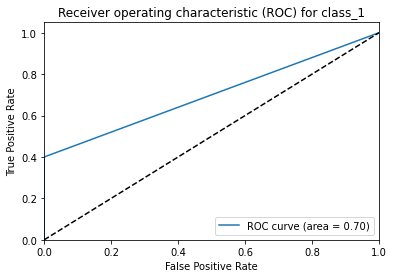

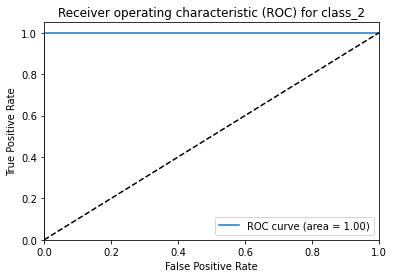

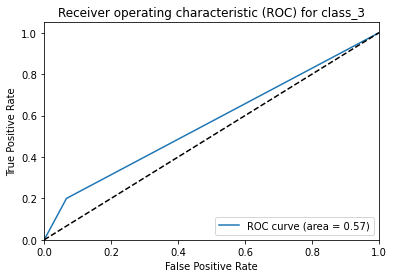

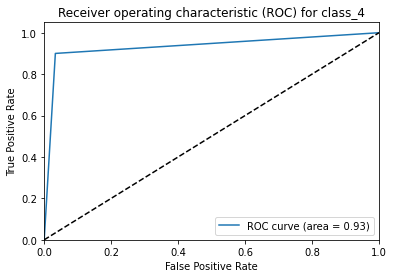

In [33]:
for i in range(class_label.shape[0]):
    plt.figure()
    plt.plot(fpr_svm[i], tpr_svm[i], label='ROC curve (area = %0.2f)' % roc_auc_svm[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic (ROC) for %s' % class_label[i])
    plt.legend(loc="lower right")
    plt.show()

In [34]:
DT_kappa = cohen_kappa_score(y_true, y_pred_svm)
DT_kappa

0.7

In [35]:
FP = svm_cm.sum(axis=0) - np.diag(svm_cm) 
FN = svm_cm.sum(axis=1) - np.diag(svm_cm)
TP = np.diag(svm_cm)
TN = svm_cm.sum() - (FP + FN + TP)
FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)

# Sensibilidade, taxa de acerto, recall ou taxa de true positive 
TPR = TP/(TP+FN)
print("Sensibilidade:\t", TPR)
# Especificidade ou taxa de true negative
TNR = TN/(TN+FP) 
print("True Negative:\t", TNR)
# Precisao
PPV = TP/(TP+FP)
print("Precisão:\t", PPV)
# Predicao negativa
NPV = TN/(TN+FN)
print("Pred. Negativa:\t", NPV)
# False positive
FPR = FP/(FP+TN)
print("False Positive: ", FPR)
# False negative
FNR = FN/(TP+FN)
print("False Negative:\t", FNR)
# False discovery
FDR = FP/(TP+FP)
print("F Discovery:\t", FDR)
# Accuracy for each class
ACC = (TP+TN)/(TP+FP+FN+TN)
print("Acurácia:\t", ACC)    

Sensibilidade:	 [1.  1.  0.2 0.9]
True Negative:	 [0.76666667 1.         0.96666667 0.96666667]
Precisão:	 [0.58823529 1.         0.66666667 0.9       ]
Pred. Negativa:	 [1.         1.         0.78378378 0.96666667]
False Positive:  [0.23333333 0.         0.03333333 0.03333333]
False Negative:	 [0.  0.  0.8 0.1]
F Discovery:	 [0.41176471 0.         0.33333333 0.1       ]
Acurácia:	 [0.825 1.    0.775 0.95 ]
